# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [2]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

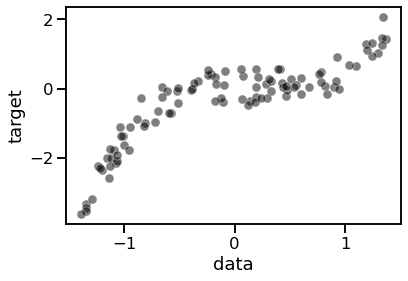

In [3]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent to be the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model. Compute the mean squared error as
well.

In [29]:
def f(data, weight=0.5, intercept=-0.5):
    target_predict = weight * data + intercept
    return target_predict

<AxesSubplot:xlabel='data', ylabel='target'>

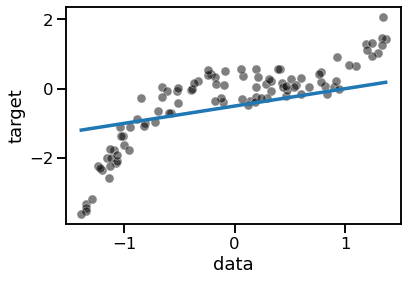

In [30]:
# Write your code here.: plot both the data and the model predictions
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

sns.lineplot(x=data, y=f(full_data["data"]))

In [31]:
# Write your code here.: compute the mean squared error
def mse(y_real, y_pred):
    return np.mean(np.sum((y_real - y_pred))**2)

print(mse(full_data["target"], f(data)))

236.70989147985003


Train a linear regression model and plot both the data and the predictions
of the model. Compute the mean squared error with this model.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [34]:
from sklearn.linear_model import LinearRegression

# Write your code here.: fit a linear regression
model = LinearRegression()
model.fit(data.reshape(-1,1), target)

LinearRegression()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.13667781  0.60253023  0.28773745  0.12567291 -0.21376656  0.40850352
 -0.17475581  1.0969644   1.29825573 -0.32636375  0.81683011  0.08090578
  0.19052477  1.19167059 -1.20109904 -1.15603796 -1.34338849  0.93133557
  0.7788389   1.03603402  1.34013136  0.83764398 -0.10785779  0.78548169
 -1.06883161  0.39177886 -0.9986108   1.24507297  0.0611753  -0.23894657
 -0.65924429  0.76785433 -0.12277907  0.19161506 -1.34738856  0.32937939
  0.31386802  0.32741519  1.24249462  0.50909684 -0.39337788 -0.17631053
  0.55336735 -1.23136868  0.4669468   0.47778603 -0.81092883 -1.03900637
 -0.51680062 -0.38160984  0.19655096 -0.17191576  1.36744675 -1.11427453
 -0.81514508 -0.94833335  0.42870331 -0.69078351 -0.09432984 -0.71560834
 -0.95488517 -1.0909496   0.43772285 -1.01308774 -0.84956939 -0.36756952
  0.89878104 -1.12811643  0.94624574 -1.13092446  1.3340865  -0.08777664
  1.33493105  0.29356746  0.66993802 -1.29027418 -0.6081405  -1.06344963
 -0.57080745 -1.06756239 -0.5096471  -0.24006362 -1.22038701  0.53892193
  0.18648407 -0.65690943  0.06509455 -1.13696657  0.21265019  1.20202935
 -0.50800693  0.46874906 -1.03096599  0.60571617 -0.58966294 -0.88706419
  0.24223622 -1.34369887  0.92103208 -1.38685267].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

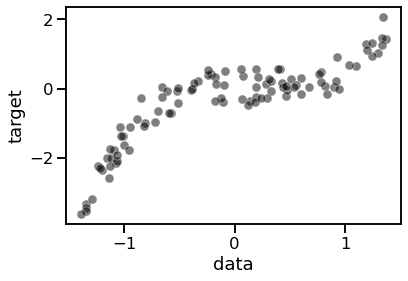

In [43]:
# Write your code here.: plot the data and the prediction of the linear
# regression model
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

preds = model.predict(data)
print(preds)

#sns.lineplot(x=data, y=preds.reshape(-1,1))

In [ ]:
# Write your code here.: compute the mean squared error